In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:

import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

2016-08-23 00:00:00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2015 non-null   object 
 1   precipitation  2015 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.2+ KB


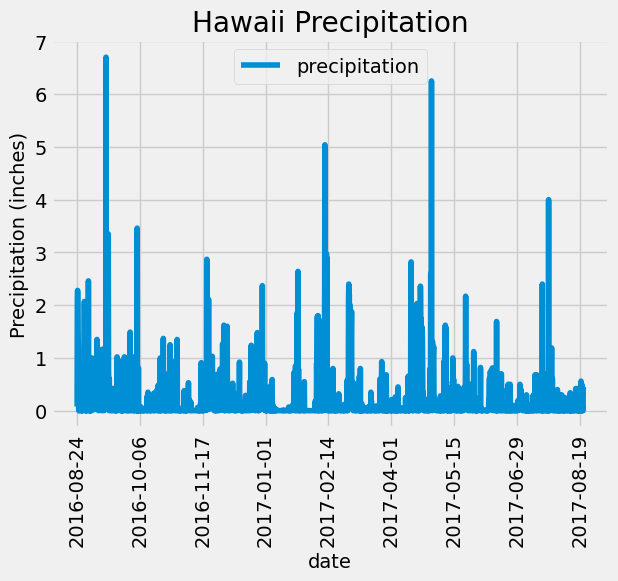

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date
# Calculate the date one year from the last date in data set.
year_ago_date = dt.datetime(2017,8,23) - dt.timedelta(days=365)
print(year_ago_date)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago_date).all()
precipitation_scores

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_dataframe = pd.DataFrame(precipitation_scores, columns = ['date', 'precipitation'])
precipitation_dataframe

# Sort the dataframe by date
precipitation_dataframe = precipitation_dataframe.sort_values('date')
precipitation_dataframe

#check for missing values; drop nan
precipitation_dataframe.dropna(inplace=True)
precipitation_dataframe.info()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_dataframe.plot(x = 'date' , y = 'precipitation', rot = 90)

#add title and y label 
plt.title('Hawaii Precipitation')
plt.ylabel('Precipitation (inches)')
plt.savefig("./Images/HawaiiPrecipitation.png")
plt.show()


In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_dataframe.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number of stations in the dataset
count_stations = session.query(func.count(Station.station)).all()
count_stations

[(9,)]

In [33]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)]
most_active_station_temperature = session.query(*sel).\
filter(Measurement.station == 'USC00519281').all()
most_active_station_temperature

[(54.0, 85.0, 71.66378066378067)]

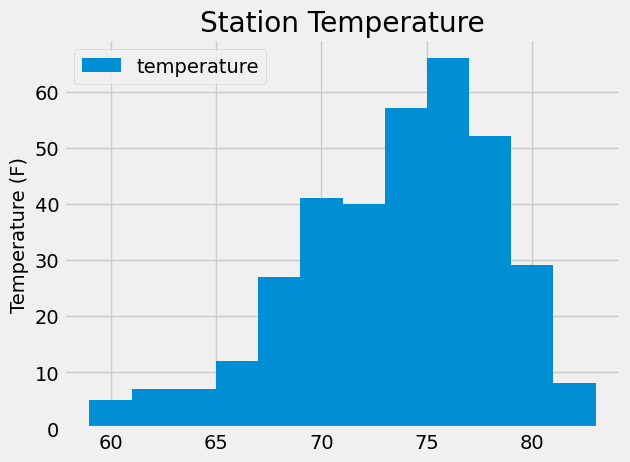

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_12month_temperature = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= year_ago_date).all()
most_active_station_12month_temperature

#create DataFrame
tobs_dataframe = pd.DataFrame(most_active_station_12month_temperature, columns = ['temperature'])
tobs_dataframe

#make the histogram
tobs_dataframe.plot.hist(bins=12)

plt.title('Station Temperature')
plt.ylabel('Temperature (F)')
plt.savefig("./Images/StationTemperature.png")
plt.show()

# Close Session

In [41]:
# Close Session
session.close()

[58.0, 74.14387974230493, 87.0]